In [1]:
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
from gudhi.wasserstein import wasserstein_distance
import gudhi.representations
import math
from sklearn.metrics.pairwise import euclidean_distances
from tabulate import tabulate
from IPython.display import HTML, display

# TARGET

In this project we work with 10 different datasets, nine of which are obtained by sampling approximately 800 points from a Gaussian Random Field and one from a different Gaussian Random Field. The goal is to find, using TDA, which dataset differs from all the others.

We start by importing the data.

In [2]:
data0 = np.loadtxt('0_reduced.txt')
 
data1 = np.loadtxt('1_reduced.txt')
 
data2 = np.loadtxt('2_reduced.txt')
 
data3 = np.loadtxt('3_reduced.txt')
 
data4 = np.loadtxt('4_reduced.txt')
 
data5 = np.loadtxt('5_reduced.txt')
 
data6 = np.loadtxt('6_reduced.txt')
 
data7 = np.loadtxt('7_reduced.txt')
 
data8 = np.loadtxt('8_reduced.txt')
 
data9 = np.loadtxt('9_reduced.txt')

In [3]:
dati = []
dati.append(data0)
dati.append(data1)
dati.append(data2)
dati.append(data3)
dati.append(data4)
dati.append(data5)
dati.append(data6)
dati.append(data7)
dati.append(data8)
dati.append(data9)

We compute the Rips Complex on each dataset, which is a simplex tree of dimension 2, where the dimension is defined as the maximum dimension of the simplices included in the filtration. Then we compute the persistence diagram of each complex. 

For memory reason, what we store are only the 10 persistence diagrams.

In [4]:
diagram = []
for i in range(10):
    rc = gd.RipsComplex(points=dati[i])
    st = rc.create_simplex_tree(max_dimension = 2)
    diagram.append(st.persistence())
    

## Plot of the Persistence Diagrams

/orfeo/cephfs/home/area/gpanerai/venv/lib64/python3.11/site-packages/gudhi/persistence_graphical_tools.py:105: UserWarning: This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.
  warnings.warn(f"This function is not available.\nModuleNotFoundError: No module named '{import_error.name}'.")


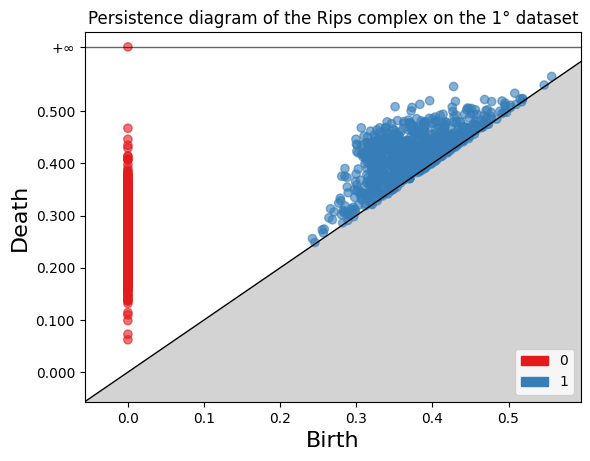

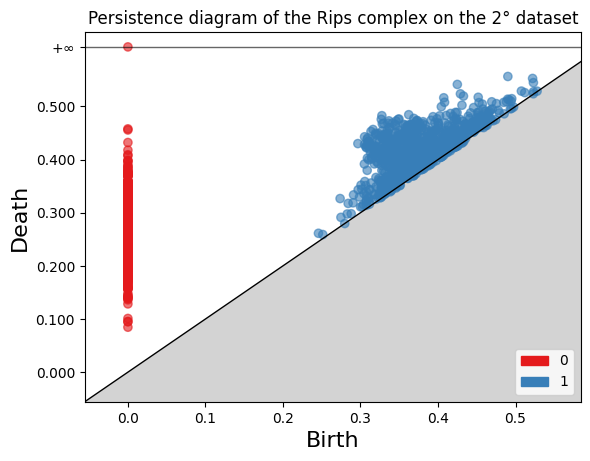

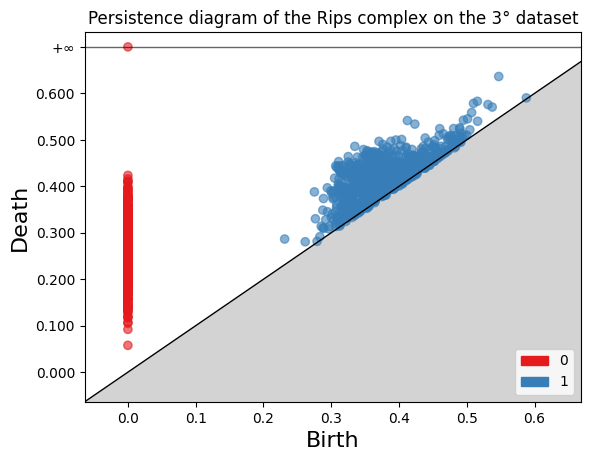

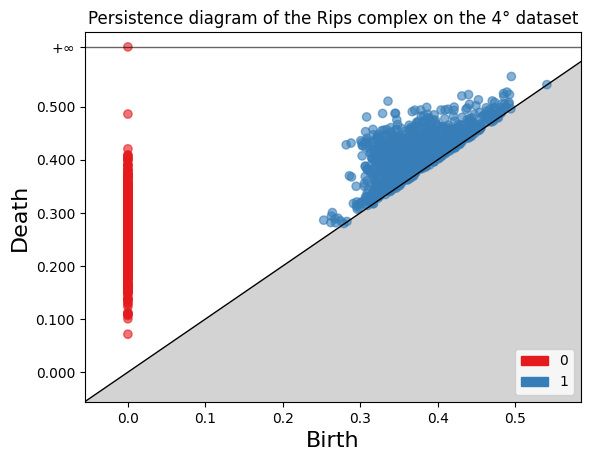

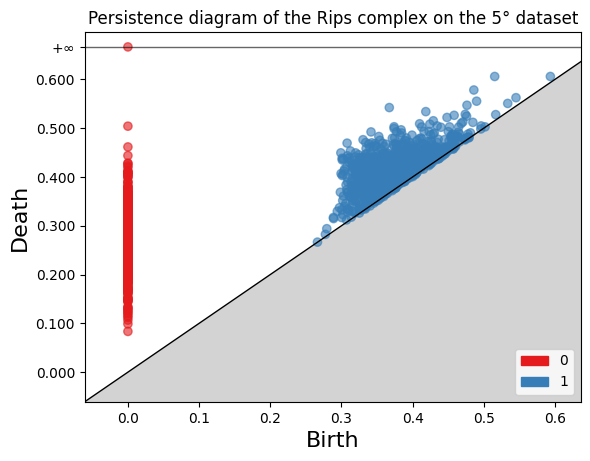

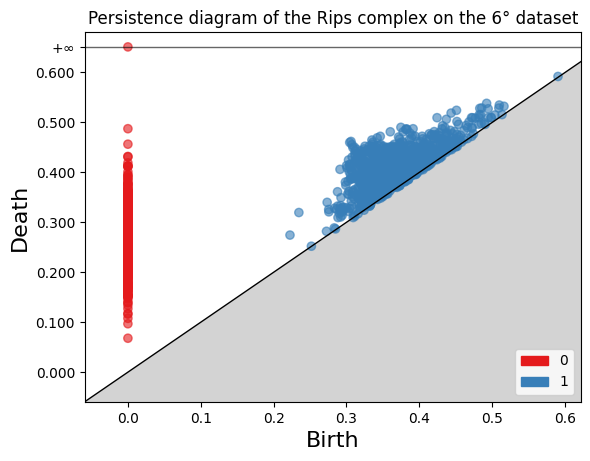

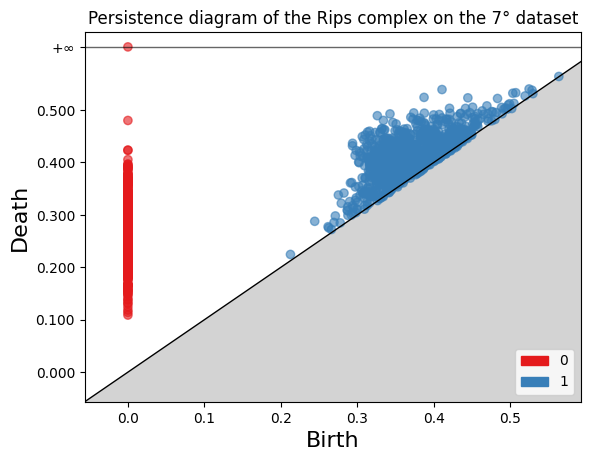

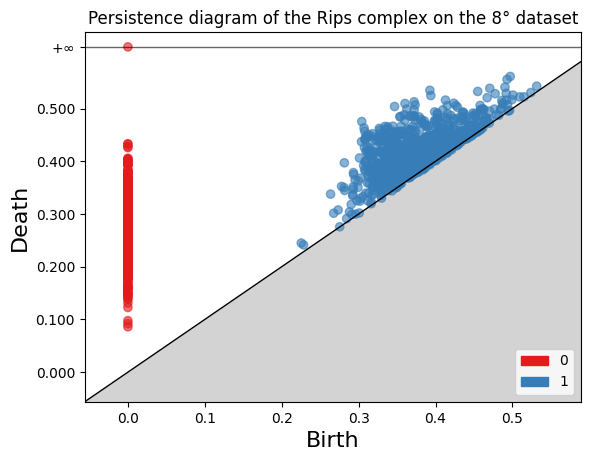

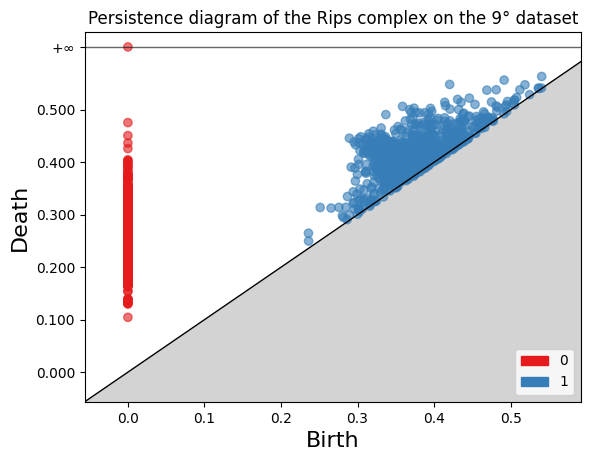

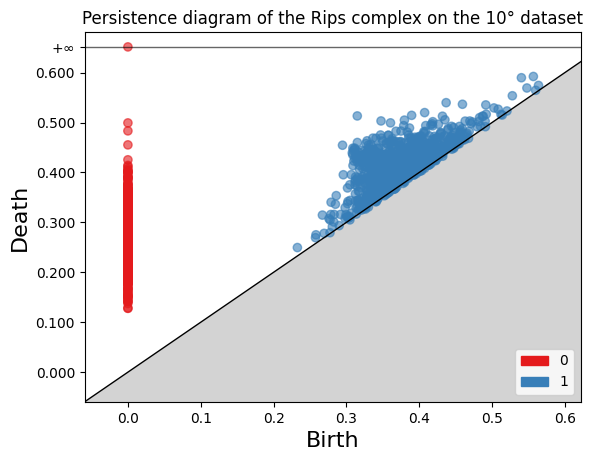

In [5]:
for i in range(10):
    gd.plot_persistence_diagram(diagram[i])
    plt.title('Persistence diagram of the Rips complex on the '+str(i+1)+'° dataset')

By only looking at the diagrams it is difficult to find the difference between the dataset, in particular the homological features of the different datasets.

From each persistence diagram we can obtain the points of dimension $0$ and $1$. 

In [6]:
points0 = np.array(np.empty(1, dtype=object))
points1 = np.array(np.empty(1, dtype=object))

for i in range(10):
    a = []
    b = []
    for j in range(len(diagram[i])):
        if (diagram[i][j][0] == 0):
            a.append(diagram[i][j][1])
        else:
            b.append(diagram[i][j][1])       
    points0[i] = a
    points1[i] = b
    points0 = np.append(points0, np.empty(1, dtype=object))
    points1 = np.append(points1, np.empty(1, dtype=object))

points = []
for i in range(10):
    points.append(np.concatenate((points0[i],points1[i])))


### Frequency table of points in the persistence diagram

In [7]:
a_list = [
    ["Number of:", "Diagram 1", "Diagram 2", "Diagram 3", "Diagram 4", "Diagram 5", "Diagram 6", "Diagram 7", "Diagram 8", "Diagram 9", "Diagram 10"],
    ["Points of dim. 0", len(points0[0]), len(points0[1]), len(points0[2]), len(points0[3]), len(points0[4]), len(points0[5]), len(points0[6]), len(points0[7]), len(points0[8]), len(points0[9])],
    ["Points of dim. 1", len(points1[0]), len(points1[1]), len(points1[2]), len(points1[3]), len(points1[4]), len(points1[5]), len(points1[6]), len(points1[7]), len(points1[8]), len(points1[9])],
    ["Total points", len(points[0]), len(points[1]), len(points[2]), len(points[3]), len(points[4]), len(points[5]), len(points[6]), len(points[7]), len(points[8]), len(points[9])]
]

table = tabulate(
    a_list,
    tablefmt='html',
    headers='firstrow'
)

table

Number of:,Diagram 1,Diagram 2,Diagram 3,Diagram 4,Diagram 5,Diagram 6,Diagram 7,Diagram 8,Diagram 9,Diagram 10
Points of dim. 0,833,784,806,847,766,813,827,813,769,810
Points of dim. 1,868,826,852,916,821,841,864,836,787,834
Total points,1701,1610,1658,1763,1587,1654,1691,1649,1556,1644


## Bottleneck distance

The idea is to use the Bottleneck distance between persistence diagrams as a measure of similarity between them. It is sufficient to compute it for $45$ pairs of persistence diagrams.

So, we construct a matrix $10 \times 10$, where in the cell $(i,j)$ there is the Bottleneck distance between diagram $i$ and diagram $j$. From the symmetry of the definition of distance it is sufficient to consider the matrix as an upper triangular matrix.

In [8]:
BD = np.zeros(shape= (10,10))
BD0 = np.zeros(shape= (10,10))
BD1 = np.zeros(shape= (10,10))
BDM = np.zeros(shape= (10,10))

for i in range(9):
    for j in range(10):
        if j > i:
            BD[i,j] = gd.bottleneck_distance(points[i],points[j])
            BD0[i,j] = gd.bottleneck_distance(points0[i],points0[j])
            BD1[i,j] = gd.bottleneck_distance(points1[i],points1[j])
            BDM[i,j] = (BD0[i,j]+BD1[i,j])/2

### Idea:
We construct a ranking given by a vector indexes of length $45$, whose elements are the pairs of indices $(i,j)$ which denote respectively the diagrams $i$ and $j$. At the top of the ranking, and therefore in the first entries of the vector indexes, there will be the pairs $(i,j)$ for which the bottleneck distance between the diagram $i$ and $j$ is closest to $0$. This implies a greater similarity between the two diagrams.

In [9]:
bd = []
for i in range(10):
    for j in range(10):
        if BDM[i,j] != 0:
            bd.append(BDM[i,j])

bd = np.asarray(bd)

In [10]:
bd = sorted(bd)

indexes = []
for i in range(len(bd)):
    for j in range(10):
        for k in range(10):
            if bd[i] == BDM[j,k] and (j,k) not in indexes:
                indexes.append((j,k))

For each diagram $i$, for $i \in \{ 1, \dots, 10 \}$, we print a vector $p$ of dimension $10$, where in each entry $i$ there is the probability that the bottleneck distance between diagram $i$ and all the others appears in the last $10$ positions of the indexes vector. A high probability implies that diagram $i$ is not very similar to some of the other diagrams.

In [11]:
p = np.zeros(10)
for i in range(10):
    for j in range(35,45,1):
        if (i == indexes[j][0] or i == indexes[j][1]):
            p[i] = p[i] + 1

p = p/10
p

array([0.2, 0. , 0.4, 0.2, 0.7, 0.1, 0.1, 0.1, 0.1, 0.1])

In [12]:
for i in range(len(p)):
    if p[i] == np.max(p):
        print('The diagram which has the greatest probability to be in the last 10 position is '+str(i+1)+'° with probability '+str(np.max(p)))

The diagram which has the greatest probability to be in the last 10 position is 5° with probability 0.7


Now we print the probability that the Bottleneck distance between diagram 5 and all the others is in the first 15 positions.

In [13]:
p5 = 0
for j in range(15):
    if (4 == indexes[j][0] or 4 == indexes[j][1]):
        p5 = p5 +1
p5 = p5/15
p5

0.06666666666666667

### Another idea: 
For each diagram $i$ we compute the average of the bottleneck distances between diagram $i$ and all the others. The higher the average, the more different the $i$ diagram will be on average from the other diagrams.

In [14]:
for i in range(9):
    for j in range(10):
        if j > i:
            BDM[j,i] = BDM[i,j]

In [15]:
average = []
for i in range(10):
    a = 0
    for j in range(10):
        if j != i:
            a = a + BDM[i,j]
    average.append(a/10)


In [16]:
for i in range(len(average)):
    if average[i] == np.max(average):
        print('The diagram which has on average the greatest bottleneck distance is the '+str(i+1)+'° with value '+str(np.max(average)))

The diagram which has on average the greatest bottleneck distance is the 5° with value 0.06049515397926334


## Wasserstein distance

We repeat the same ideas, but now we use the Wasserstein distance with parameter $p=2$ as metric to compare the diagrams.

### First idea 

In [17]:
WD = np.zeros(shape= (10,10))
WD0 = np.zeros(shape= (10,10))
WD1 = np.zeros(shape= (10,10))
WDM = np.zeros(shape= (10,10))

for i in range(9):
    for j in range(10):
        if j > i:
            WD[i,j] = wasserstein_distance(np.asarray(points[i]), np.asarray(points[j]), order=2)
            WD0[i,j] = wasserstein_distance(np.asarray(points0[i]),np.asarray(points0[j]))
            WD1[i,j] = wasserstein_distance(np.asarray(points1[i]),np.asarray(points1[j]))
            WDM[i,j] = (WD0[i,j]+WD1[i,j])/2
            

In [18]:
wd = []
for i in range(10):
    for j in range(10):
        if WDM[i,j] != 0:
            wd.append(WDM[i,j])

wd = np.asarray(wd)

In [19]:
wd = sorted(wd)

w_indexes = []
for i in range(len(wd)):
    for j in range(10):
        for k in range(10):
            if wd[i] == WDM[j,k] and (j,k) not in w_indexes:
                w_indexes.append((j,k))

In [20]:
p = np.zeros(10)
for i in range(10):
    for j in range(35,45,1):
        if (i == w_indexes[j][0] or i == w_indexes[j][1]):
            p[i] = p[i] + 1

p = p/10
p # probabilità che la distanza di Wasserstein tra il diagramma i e tutti gli altri stia nelle ultime 10 posizioni

array([0.2, 0.1, 0. , 0.3, 0.4, 0.2, 0.2, 0.1, 0.5, 0. ])

In [21]:
for i in range(len(p)):
    if p[i] == np.max(p):
        print('The diagram which has the greatest probability to be in the last 10 position is '+str(i+1)+'° with probability '+str(np.max(p)))

The diagram which has the greatest probability to be in the last 10 position is 9° with probability 0.5


In [22]:
p5 = 0
for j in range(15):
    if (4 == w_indexes[j][0] or 4 == w_indexes[j][1]):
        p5 = p5 +1
p5 = p5/15
p5 # probabilità che la distanza di Wasserstein tra il diagramma 5 e tutti gli altri stia nelle prime 15 posizioni

0.06666666666666667

### Second idea

In [23]:
for i in range(9):
    for j in range(10):
        if j > i:
            WDM[j,i] = WDM[i,j]
            

In [24]:
average = []
for i in range(10):
    a = 0
    for j in range(10):
        if j != i:
            a = a + WDM[i,j]
    average.append(a/10)


In [25]:
for i in range(len(average)):
    if average[i] == np.max(average):
        print('The diagram which has on average the greatest Wasserstein distance is the '+str(i+1)+'° with value '+str(np.max(average)))

The diagram which has on average the greatest Wasserstein distance is the 9° with value 4.952572224660324


## Persistence Images 

In [26]:
for i in range(10):
    points0[i] = np.asarray(points0[i])
    points1[i] = np.asarray(points1[i])

In [27]:
y_max = []

for j in range(10):
    y_max.append(np.max([points[j][i][1] for i in range(points0[j].shape[0])]))
y_max

[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]

In [28]:
# Only for dimension zero: persistence_image does not work with pairs such that the second component is infinite

for i in range(10):
    points0[i] = points0[i].tolist()

for j in range(10):
    if math.isinf(y_max[j]) == True:
        index= []
        for i in range(len(points0[j])):
            if math.isinf(points0[j][i][1]) == True:
                index.append(i)

    elements_to_remove = []
    for i in range(len(index)):
        elements_to_remove.append(points0[j][index[i]])
    for i in elements_to_remove:
            points0[j].remove(i)

In [29]:
for j in range(10):
    points0[j] = np.asarray(points0[j])
    y_max[j] = np.max([points0[j][i][1] for i in range(points0[j].shape[0])])
y_max

[0.46736360938560106,
 0.4577570205605564,
 0.42343242244704643,
 0.4860168476173902,
 0.5041767250829897,
 0.4874316484522127,
 0.4800328490964723,
 0.43299951975930756,
 0.4755419047746021,
 0.4992257859300816]

In [119]:
pi0 = []
for i in range(10):
    PI0 = gd.representations.PersistenceImage(bandwidth=0.01, weight=lambda x: 1, resolution=[50,50])
    pi0.append(PI0.fit_transform([np.asarray(points0[i])]))

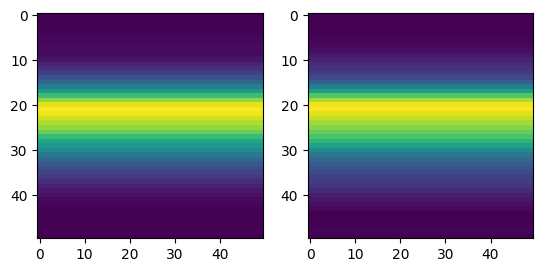

In [120]:
f, ax = plt.subplots(1,2) 
ax[0].imshow(np.flip(np.reshape(pi0[0][0], [50,50]), 0))
ax[1].imshow(np.flip(np.reshape(pi0[1][0], [50,50]), 0))

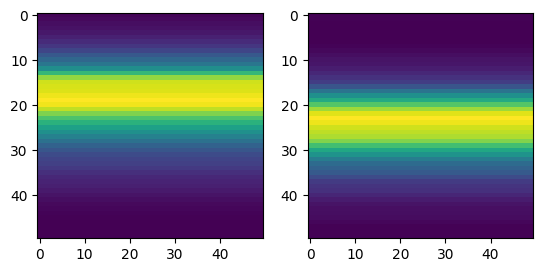

In [121]:
f, ax = plt.subplots(1,2) 
ax[0].imshow(np.flip(np.reshape(pi0[2][0], [50,50]), 0))
ax[1].imshow(np.flip(np.reshape(pi0[3][0], [50,50]), 0))

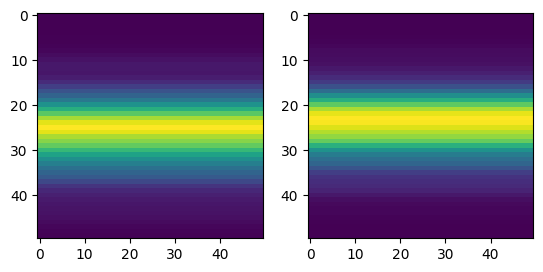

In [122]:
f, ax = plt.subplots(1,2) 
ax[0].imshow(np.flip(np.reshape(pi0[4][0], [50,50]), 0))
ax[1].imshow(np.flip(np.reshape(pi0[5][0], [50,50]), 0))

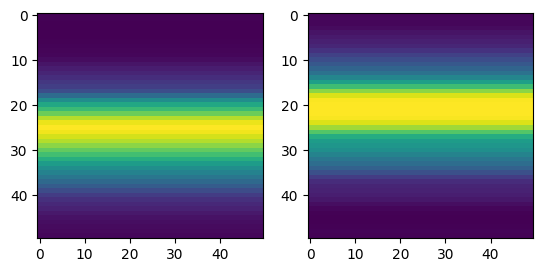

In [123]:
f, ax = plt.subplots(1,2) 
ax[0].imshow(np.flip(np.reshape(pi0[6][0], [50,50]), 0))
ax[1].imshow(np.flip(np.reshape(pi0[7][0], [50,50]), 0))

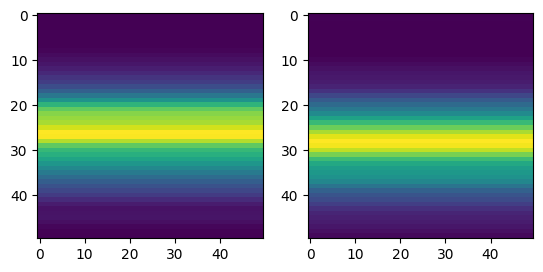

In [124]:
f, ax = plt.subplots(1,2) 
ax[0].imshow(np.flip(np.reshape(pi0[8][0], [50,50]), 0))
ax[1].imshow(np.flip(np.reshape(pi0[9][0], [50,50]), 0))

In [131]:
pi0

[array([[2494.57683317, 2494.57683317, 2494.57683317, ..., 1771.01867463,
         1771.01867463, 1771.01867463]]),
 array([[3851.04003346, 3851.04003346, 3851.04003346, ..., 3208.31484699,
         3208.31484699, 3208.31484699]]),
 array([[1595.90016567, 1595.90016567, 1595.90016567, ..., 4790.71910077,
         4790.71910077, 4790.71910077]]),
 array([[1622.69584364, 1622.69584364, 1622.69584364, ..., 1591.54943164,
         1591.54943164, 1591.54943164]]),
 array([[2227.46359621, 2227.46359621, 2227.46359621, ..., 1591.73283649,
         1591.73283649, 1591.73283649]]),
 array([[1616.09238913, 1616.09238913, 1616.09238913, ..., 1604.724404  ,
         1604.724404  , 1604.724404  ]]),
 array([[4762.63714721, 4762.63714721, 4762.63714721, ..., 1591.54976449,
         1591.54976449, 1591.54976449]]),
 array([[3750.69922024, 3750.69922024, 3750.69922024, ..., 5921.55621824,
         5921.55621824, 5921.55621824]]),
 array([[1816.65693591, 1816.65693591, 1816.65693591, ..., 1667.23917565

In [132]:
pi1 = []
for i in range(10):
    PI1 = gd.representations.PersistenceImage(bandwidth=0.003, weight=lambda x: 1, resolution=[100,100])
    pi1.append(PI1.fit_transform([np.asarray(points1[i])]))

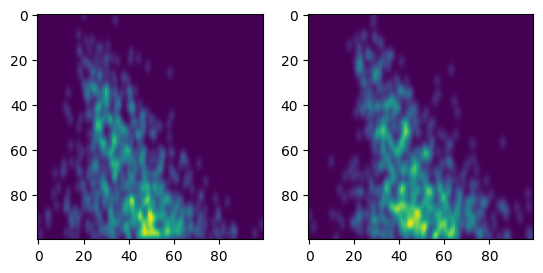

In [133]:
f, ax = plt.subplots(1,2) 
ax[0].imshow(np.flip(np.reshape(pi1[0][0], [100,100]), 0))
ax[1].imshow(np.flip(np.reshape(pi1[1][0], [100,100]), 0))

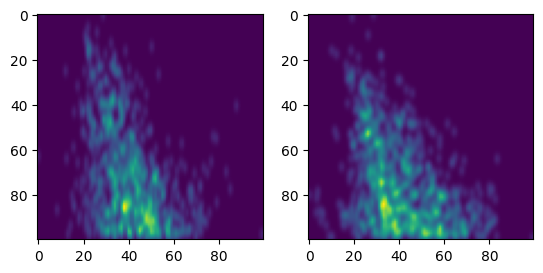

In [134]:
f, ax = plt.subplots(1,2) 
ax[0].imshow(np.flip(np.reshape(pi1[2][0], [100,100]), 0))
ax[1].imshow(np.flip(np.reshape(pi1[3][0], [100,100]), 0))

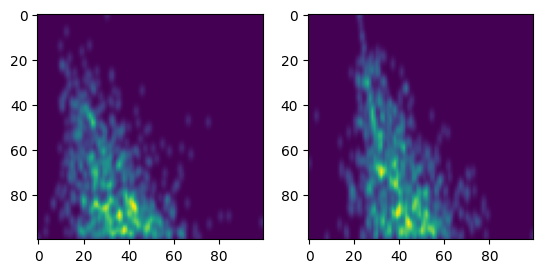

In [135]:
f, ax = plt.subplots(1,2) 
ax[0].imshow(np.flip(np.reshape(pi1[4][0], [100,100]), 0))
ax[1].imshow(np.flip(np.reshape(pi1[5][0], [100,100]), 0))

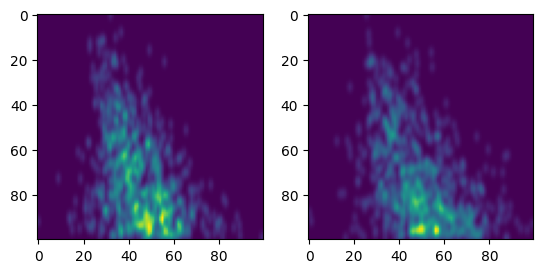

In [136]:
f, ax = plt.subplots(1,2) 
ax[0].imshow(np.flip(np.reshape(pi1[6][0], [100,100]), 0))
ax[1].imshow(np.flip(np.reshape(pi1[7][0], [100,100]), 0))

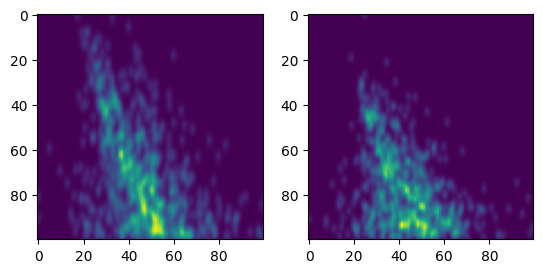

In [137]:
f, ax = plt.subplots(1,2) 
ax[0].imshow(np.flip(np.reshape(pi1[8][0], [100,100]), 0))
ax[1].imshow(np.flip(np.reshape(pi1[9][0], [100,100]), 0))

In [138]:
pi = []
for i in range(10):
    pi.append(np.concatenate((pi0[i][0],pi1[i][0])))

In [ ]:
ED = np.zeros(shape= (10,10))
for i in range(10):
    for j in range(10):
        if j > i:
            ED[i,j] = euclidean_distances([pi[i]],[pi[j]])
            ED[j,i] = ED[i,j]

In [142]:
average = []
for i in range(10):
    a = 0
    for j in range(10):
        if j != i:
            a = a + ED[i,j]
    average.append(a/10)

average

[2505032.1438153624,
 2583153.5986500224,
 3872110.4540026225,
 2554446.579324753,
 2934467.3653549375,
 2448874.389707708,
 2687414.797521245,
 2946716.322714068,
 2583841.6060470617,
 3385607.49018474]

In [141]:
for i in range(len(average)):
    if average[i] == np.max(average):
        print('The diagram which has on average the greatest Euclidean distance from the persistence images of the other diagrams\n' 
              'is the '+str(i+1)+'° with value '+str(np.max(average)))

The diagram which has on average the greatest Euclidean distance from the persistence images of the other diagrams
is the 3° with value 3872110.4540026225
